# [CptS 215 Data Analytics Systems and Algorithms](https://piazza.com/wsu/fall2017/cpts215/home)
[Washington State University](https://wsu.edu)

[Srini Badri](https://school.eecs.wsu.edu/people/faculty/), [Gina Sprint](http://eecs.wsu.edu/~gsprint/)
## MA6 Queue Analysis (50 pts)
<mark>Due: Sunday March 27th</mark>

### Learner Objectives
At the conclusion of this micro assignment, participants should be able to:
* Analyze stack and queue data structures for efficiency
* Implement a queue using two stacks
* Compare/contrast different implementations of a queue ADT

### Prerequisites
Before starting this micro assignment, participants should be able to:
* Write object oriented Python code
* Write Markdown and code cells in Jupyter Notebook
* Understand the stack ADT and implement a stack
* Understand the queue ADT and implement a queue

### Acknowledgments
Content used in this assignment is based upon information in the following sources:
* Carl Kingsford's [Basic Data Structures](https://www.engage-csedu.org/find-resources/problem-set-1-basic-data-structures) problem set.

## Overview and Requirements
For this micro assignment, you are going to download this Jupyter Notebook and answer the following questions. Your answer for a problem should be in a cell *immediately* after the problem cell. *Do not modify the problem cell.*

We are going to explore the efficiency of two different queue implementations. This micro assignment includes conceptional questions and programming.

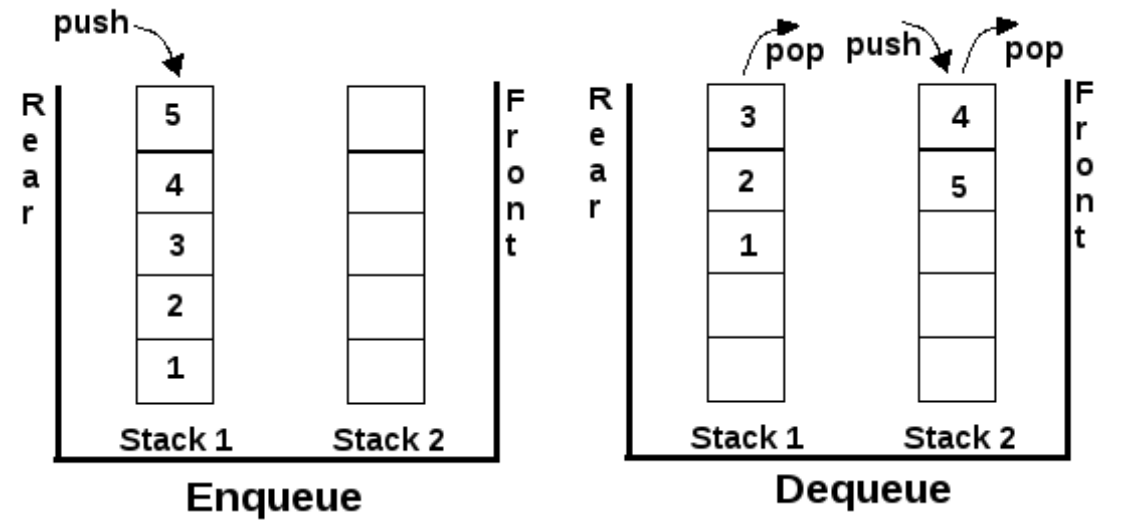


### Conceptual Questions (30 pts)
Suppose you are given a (strange) computer that can only perform the following instructions (in addition to if and while):
* `S = create_stack()` create stack makes a new stack `S`
* `i = S.pop()` removes the top item from stack `S` and places it in variable `i`
* `S.push(i)` makes item `i` the top item in stack `S`

Solve the following problems and *justify* your answers:
1. (15 pts) Show how you can use these operations to implement a queue (operations `Q = create_queue()`, `enqueue(i)`, `i = dequeue()`)
    * A picture might help to explain your answer
    * Hint: take a look at the following image:
1. (7 pts) What's the worst case running time of your dequeue implementation?
1. (8 pts) Over a series of `n` enqueues followed by `n` dequeues, how many `pop()` operations does your implementation perform?


### Conceptual Question Answers
1. ```python
    class Queue:
        def __init__(self):
            self.s1 = create_stack()
            self.s2 = create_stack()

        def enqueue(self, i):
             self.s1.push(i) #just push onto the first stack
    
        def dequeue(self):
            if not self.s2: #if s2 is empty and s1 is empty
                if not self.s1:
                    return
            while self.s1: #while s1 is not empty
                temp = self.s1.pop()
                self.s2.push(temp) #push the top item of s1 onto s2
            return self.s2.pop() #remove and return the top item of s2

    def create_queue():
        """
        Not a queue method, this is a seperate function
        """
        return Queue()
    ```
2. The worst case runtime of dequeue would be $O(n)$ where n is the number of elements in the stack because if the second stack is empty then we have to push all n items onto the second stack
3. With `n` enqueues followed by `n` dequeues. `n` dequeues will require `k` pops on the first stack on the initial dequeue call, where `k` is equal to the number of items on `s1` so the total pop operations would be $n + k$. Enqueue on the other hand requires no `pop` calls


### Implementation Questions (20 pts)
Write a program that implements a queue using a standard list implementation (see lecture material) and a queue using your solution to conceptual question #1. For the latter, you must implement a stack using a standard list implementation (see lecture material).

Perform a series of `enqueue` and `dequeue` operations using data from [words.txt](https://raw.githubusercontent.com/gsprint23/cpts215/master/microassignments/files/words.txt), a file containing all 118,309 valid crossword puzzle words, one on each line. Perform the operations as described below:

1. Write code to `enqueue` data of different sizes, say 1,000, 10,000, 100,000, into each of the queue implementations. Measure the computation time for performing a `dequeue` operation with each data size configuration for each of the queue implementations. This would test your answer to conceptual question #2.

1. Write code to perform a series of `n` (say 10,000) `enqueue` operations followed by a series of `n` (say 10,000) `dequeue` operations. Measure the number of `pop()` operations called during the series of `n` `enqueue` operation followed by `n` `dequeue` operations. This would test your answer to conceptual questions #3.

### Queue made up of two stacks

In [3]:
import timeit #makes it so I don't have to log a start and end time
from collections import deque #for the bonus

class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def is_empty(self) -> bool:
        return self.items == []

class Queue:
    def __init__(self):
        self.s1 = self.create_stack()
        self.s2 = self.create_stack()
        self.pop_count = 0

    def create_stack(self):
        return Stack()

    def enqueue(self, item):
        """
        Inserts item into the queue by pushing onto stack 1
        """
        self.s1.push(item)

    def dequeue(self):
        """
        Removes and returns the head of the queue
        """
        if not self.s2: #if s2 is empty 
            if not self.s1:
                return
        while not self.s1.is_empty(): #while s1 is not empty (I made is_empty only because this was throwing index errors)
            self.pop_count += 1
            temp = self.s1.pop()
            self.s2.push(temp) #push the top item of s1 onto s2
        self.pop_count += 1
        return self.s2.pop() #remove and return the top item of s2

    def size(self):
        return len(self.s1.items) + len(self.s2.items)

#### Timing how long a single dequeue operation takes

In [13]:
words = open("words.txt")
sizes = [1000, 10000, 100000]
for size in sizes:
    q = Queue()
    for x in range(size):
        word = words.readline()
        q.enqueue(word)
    #q.dequeue()
    print("List size of", size, timeit.timeit(lambda:q.dequeue(), number=1), "seconds")
    

List size of 1000 0.0006531000001359644 seconds
List size of 10000 0.0078038999999989755 seconds
List size of 100000 0.07348359999991771 seconds


#### Counting how many pops it takes to clear the queue

In [18]:
q = Queue()
for x in range(10000):
    word = words.readline()
    q.enqueue(word)

while q.size() > 0:
    q.dequeue()

q.pop_count

20000

### Queue Using Python List

In [6]:
class ListQueue:
    def __init__(self):
        """
        Queue constructor, includes a list of items and a counter variable to count pop operations
        """
        self.items = []
        self.pop_count = 0
    
    def is_empty(self) -> bool:
        """
        Checks if the queue is empty by checking if self.items is the same as an empty list
        """
        return self.items == []

    def enqueue(self, item):
        """
        Adds an item to the queue by utilizing list methods and appending item
        to the end of the list
        """
        self.items.append(item)

    def dequeue(self):
        """
        Removes and returns the element at the front of the list and increases self.pop_count
        """
        self.pop_count += 1
        return self.items.pop(0)
    
    def size(self):
        """
        Returns how many items are in the queue
        """
        return len(self.items)


#### Timing how long it takes to do a single dequeue

In [7]:
words = open("words.txt")
sizes = [1000, 10000, 100000]
for size in sizes:
    q = ListQueue()
    for x in range(size):
        word = words.readline()
        q.enqueue(word)
    #q.dequeue()
    print("List size of", size, timeit.timeit(lambda:q.dequeue(), number=1), "seconds")

1000 1.560000009703799e-05
10000 9.900000122797792e-06
100000 7.120000009308569e-05


### Counting how many pops it takes to clear the queue

In [8]:
q = ListQueue()
for x in range(10000):
    word = words.readline()
    q.enqueue(word)

while q.size() > 0:
    q.dequeue()

q.pop_count

10000

## Bonus (5 pts)
Perform additional analysis and comparisons of your two queue implementations above to the following:
1. Linked lists implementations of the stacks and queue (you must write the implementation yourself)
1. Python's `deque` container from `collections`

Include execution time (using `time()`) results and a write up of your observations.

### Implementation with Nodes

In [21]:
class Node:
    """
    Nodes for stack and queue implementation, no methods required
    """
    def __init__(self, data):
        self.data = data 
        self.next = None 

class LinkedStack:
    def __init__(self):
        self.top = None 

    def is_empty(self) -> bool:
        """
        Checks if the stack is empty, returns True if it is, False if it is not
        """
        return self.top is None

    def push(self, data):
        """
        Adds a new node to the top of the stack, data cannot be a node
        """
        new_node = Node(data)
        if self.top is not None:
            new_node.next = self.top 
        self.top = new_node 

    def peek(self):
        """
        Returns the data of the node at the top of the stack
        """
        return self.top.data

    def pop(self):
        """
        Removes the top of the list and returns the value of the popped node
        """
        if not self.is_empty():
            temp = self.top 
            self.top = temp.next 
            temp.next = None 
        return temp.data

    def size(self):
        """
        Returns the number of items in the stack
        """
        count = 0
        cur = self.top 
        while cur is not None:
            count += 1
            cur = cur.next
        return count

    def print_stack(self):
        """
        Iterative way to print the stack
        """
        cur = self.top 
        print("Top: ", end=' ')
        while cur is not None:
            print(cur.data, end=', ')
            cur = cur.next
        print('\n')

        
class LinkedQueue: #ask if he wants the same approach as above or to just make a regular linked queue
    def __init__(self):
        """
        Implementation of a queue using linked nodes
        """
        self.head = None 
        self.tail = None
        self.pop_count = int(0)

    def is_empty(self):
        return self.head == self.tail == None

    def enqueue(self, item):
        """
        Adds item to the queue, item cannot be a node
        """
        new_node = Node(item)
        if self.is_empty():
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node 
            self.tail = new_node        

    def dequeue(self):
        """
        Removes the head of the queue
        """
        if self.head == self.tail:
            self.head = self.tail = None 
        else:
            temp = self.head 
            self.head = temp.next
            temp.next = None
        

    def size(self) -> int:
        """
        Returns the size of the queue by adding up the sizes of the two stacks
        """
        count = 0 
        cur = self.head 
        while cur is not None:
            count += 1
            cur = cur.next
        return count
        

In [20]:
words = open("words.txt")
sizes = [1000, 10000, 100000]
for size in sizes:
    q = LinkedQueue()
    for x in range(size):
        word = words.readline()
        q.enqueue(word)
    print("List size of", size, timeit.timeit(lambda:q.dequeue(), number=1), "seconds")


1000 9.580000005371403e-05
10000 7.599999662488699e-06
100000 6.300000222836388e-06


In [ ]:
q = LinkedQueue()
for x in range(10000):
    word = words.readline()
    q.enqueue(word)

while q.size() > 0:
    q.dequeue()

q.pop_count

20000

### Implementation with double ended queue (deque)
#### Timing how long a single dequeue (popleft) operation takes

In [9]:
words = open("words.txt")
sizes = [1000, 10000, 100000]
for size in sizes:
    q = deque()
    for x in range(size):
        word = words.readline()
        q.append(word) #adds item to the end of the list
    print(size, timeit.timeit(lambda:q.popleft(), number=1)) #checks how long it takes to pop the front/furthest left item

1000 9.000000318337698e-07
10000 9.999999974752427e-07
100000 1.7999999499807018e-06


#### Seeing how many pops it takes to clear the deque

In [10]:
q = deque()
pop_count = 0
for x in range(10000):
    word = words.readline()
    q.append(word)

while len(q) > 0:
    pop_count += 1
    q.popleft()

pop_count


10000

### Write up
Using a deque is the fastest way of using a queue compared to the two other implementations that I created in this assignment. Compared to the node and list implementation of a stack and using the stack in a queue, a deque is the most efficient, running in *much* lower time than the other two forms, and using half the pop calls in order to clear the queue of size 10,000

## Submitting Assignments
1.	Use Canvas to submit your assignment. You must upload your solutions as `<your last name>_ma6.zip` by the due date and time.
2.	Your .zip file should contain your .ipynb file and a .html file representing your Notebook as a webpage (File->Download as->HTML). Also include [words.txt](https://raw.githubusercontent.com/gsprint23/cpts215/master/microassignments/files/words.txt) in your .zip file.

## Grading Guidelines
This assignment is worth 50 points + 5 points bonus. Your assignment will be evaluated based on a successful compilation and adherence to the program requirements. We will grade according to the following criteria:
* 30 pts for answering the conception questions
* 5 pts for correct implementation of the list-based queue
* 5 pts for correct implementation of the stack-based queue
* 5 pts for correct implementation of test code for measuring `dequeue` operation performance
* 5 pts for correct implementation of test code for measuring `pop()` operation count